Iteration 1, Log Loss: 0.693147, mean residual entropy: 0.510000
Iteration 2, Log Loss: 1.065407, mean residual entropy: 0.599148
Iteration 3, Log Loss: 1.139613, mean residual entropy: 0.248377
Iteration 4, Log Loss: 0.436927, mean residual entropy: 0.408380
Iteration 5, Log Loss: 0.371903, mean residual entropy: 0.404968
Iteration 6, Log Loss: 0.337659, mean residual entropy: 0.401592
Iteration 7, Log Loss: 0.339906, mean residual entropy: 0.404568
Converged at iteration 8 (early stop): mean rentropy change below tolerance.
Model score: 0.85


/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and automatic signature inference during model logging. Check https://mlflow.org/docs/latest/model/python_model.html#type-hint-usage-in-pythonmodel for more details.
  color_warning(
/Users/nirmal/Documents/np_research/ManGo_code/ManGo/.venv/lib/python3.11/site-packages/mlflow/pyfunc/utils/data_validation.py:186: UserWarning: Add type hints to the `predict` method to enable data validation and 

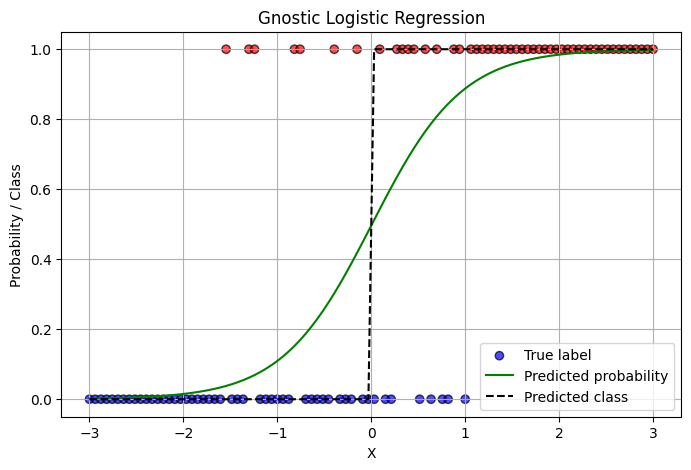

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from machinegnostics.models.classification import LogisticRegressor

# Generate synthetic binary classification data
np.random.seed(0)
n_samples = 100
X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
y = (X[:, 0] + np.random.normal(scale=1.0, size=n_samples) > 0).astype(int)

# Fit Gnostic Logistic Regression (linear)
model = LogisticRegressor(degree=1, max_iter=100, tol=1e-3, verbose=True, proba='sigmoid', early_stopping=True)
model.fit(X, y)

# Predict probabilities and classes
proba = model.predict_proba(X)
y_pred = model.predict(X)

score = model.score(X, y)
print(f"Model score: {score:.2f}")
# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k', label='True label', alpha=0.7)
plt.plot(X, proba, color='green', label='Predicted probability')
plt.plot(X.ravel(), y_pred, 'k--', label='Predicted class')
plt.xlabel('X')
plt.ylabel('Probability / Class')
plt.title('Gnostic Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
model.coefficients

array([-0.01466354,  2.08201188])

Iteration 1, Log Loss: 0.693147, mean residual entropy: 0.510000
Iteration 2, Log Loss: 1.065407, mean residual entropy: 0.599148
Iteration 3, Log Loss: 1.139613, mean residual entropy: 0.248377
Iteration 4, Log Loss: 0.436927, mean residual entropy: 0.408380
Iteration 5, Log Loss: 0.371903, mean residual entropy: 0.404968
Iteration 6, Log Loss: 0.337659, mean residual entropy: 0.401592
Iteration 7, Log Loss: 0.339906, mean residual entropy: 0.404568
Iteration 8, Log Loss: 0.343627, mean residual entropy: 0.405245
Iteration 9, Log Loss: 0.345024, mean residual entropy: 0.405428
Iteration 10, Log Loss: 0.345691, mean residual entropy: 0.405520


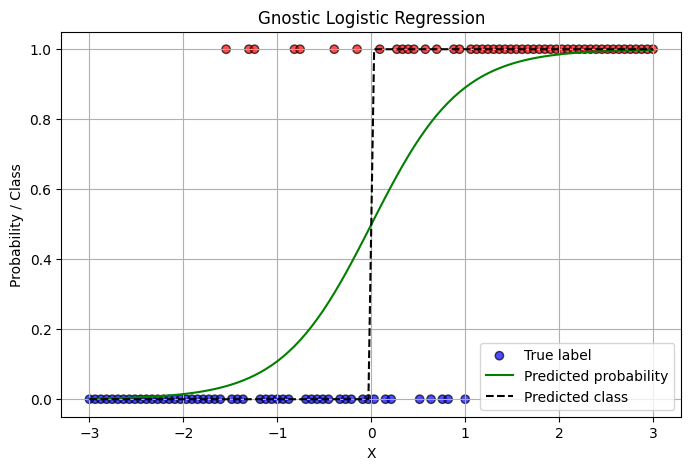

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from machinegnostics.models.classification import LogisticRegressor

# Generate synthetic binary classification data
np.random.seed(0)
n_samples = 100
X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
y = (X[:, 0] + np.random.normal(scale=1.0, size=n_samples) > 0).astype(int)

import pandas as pd

# Generate pandas DataFrame for features and Series for target
X_df = pd.DataFrame(X, columns=['feature'])
y_series = pd.Series(y, name='target')

# print(X_df.head())
# print(y_series.head())

# Fit Gnostic Logistic Regression (linear)
model = LogisticRegressor(degree=1, max_iter=10, tol=1e-6, verbose=True, proba='sigmoid')
model.fit(X_df, y_series)

# Predict probabilities and classes
proba = model.predict_proba(X_df)
y_pred = model.predict(X_df)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k', label='True label', alpha=0.7)
plt.plot(X, proba, color='green', label='Predicted probability')
plt.plot(X.ravel(), y_pred, 'k--', label='Predicted class')
plt.xlabel('X')
plt.ylabel('Probability / Class')
plt.title('Gnostic Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

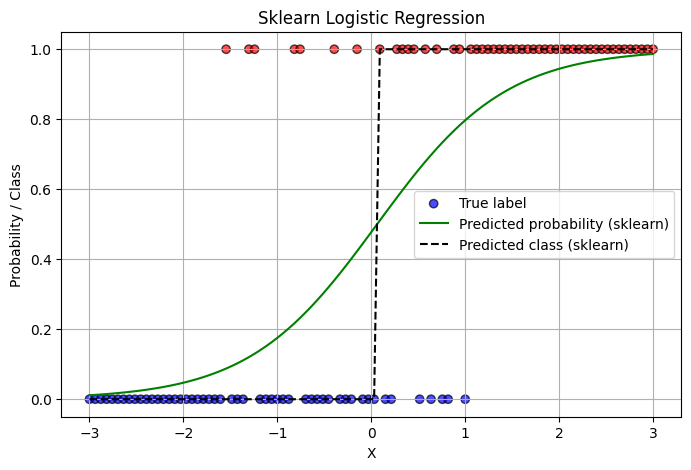

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Generate synthetic binary classification data
np.random.seed(0)
n_samples = 100
X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
y = (X[:, 0] + np.random.normal(scale=1.0, size=n_samples) > 0).astype(int)

# Fit sklearn Logistic Regression (linear)
sk_model = LogisticRegression()
sk_model.fit(X, y)

# Predict probabilities and classes
proba_sk = sk_model.predict_proba(X)[:, 1]
y_pred_sk = sk_model.predict(X)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k', label='True label', alpha=0.7)
plt.plot(X, proba_sk, color='green', label='Predicted probability (sklearn)')
plt.plot(X, y_pred_sk, 'k--', label='Predicted class (sklearn)')
plt.xlabel('X')
plt.ylabel('Probability / Class')
plt.title('Sklearn Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()

In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate predictions
# gnostic
print('Gnostic Logistic Regression Evaluation:')
print("Accuracy:", accuracy_score(y, y_pred))
print("Precision:", precision_score(y, y_pred))
print("Recall:", recall_score(y, y_pred))
print("F1-score:", f1_score(y, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

# sepperator 
print("\n" + "="*50 + "\n")


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Evaluate sklearn predictions
print("Accuracy:", accuracy_score(y, y_pred_sk))
print("Precision:", precision_score(y, y_pred_sk))
print("Recall:", recall_score(y, y_pred_sk))
print("F1-score:", f1_score(y, y_pred_sk))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_sk))
print("\nClassification Report:\n", classification_report(y, y_pred_sk))

Gnostic Logistic Regression Evaluation:
Accuracy: 0.85
Precision: 0.84
Recall: 0.8571428571428571
F1-score: 0.8484848484848485

Confusion Matrix:
 [[43  8]
 [ 7 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        51
           1       0.84      0.86      0.85        49

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



Accuracy: 0.86
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-score: 0.8571428571428571

Confusion Matrix:
 [[44  7]
 [ 7 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       0.86      0.86      0.86        49

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86

Iteration 1, Log Loss: 0.693147, mean residual entropy: 0.510000
Iteration 2, Log Loss: 1.065407, mean residual entropy: 0.599148
Iteration 3, Log Loss: 1.139613, mean residual entropy: 0.248377
Iteration 4, Log Loss: 0.436927, mean residual entropy: 0.408380
Iteration 5, Log Loss: 0.371903, mean residual entropy: 0.404968
Iteration 6, Log Loss: 0.337659, mean residual entropy: 0.401592
Iteration 7, Log Loss: 0.339906, mean residual entropy: 0.404568
Iteration 8, Log Loss: 0.343627, mean residual entropy: 0.405245
Iteration 9, Log Loss: 0.345024, mean residual entropy: 0.405428
Iteration 10, Log Loss: 0.345691, mean residual entropy: 0.405520
Iteration 11, Log Loss: 0.345919, mean residual entropy: 0.405549
Iteration 12, Log Loss: 0.346009, mean residual entropy: 0.405560
Iteration 13, Log Loss: 0.346040, mean residual entropy: 0.405564
Iteration 14, Log Loss: 0.346052, mean residual entropy: 0.405566
Converged at iteration 15 (early stop): mean rentropy change below tolerance.


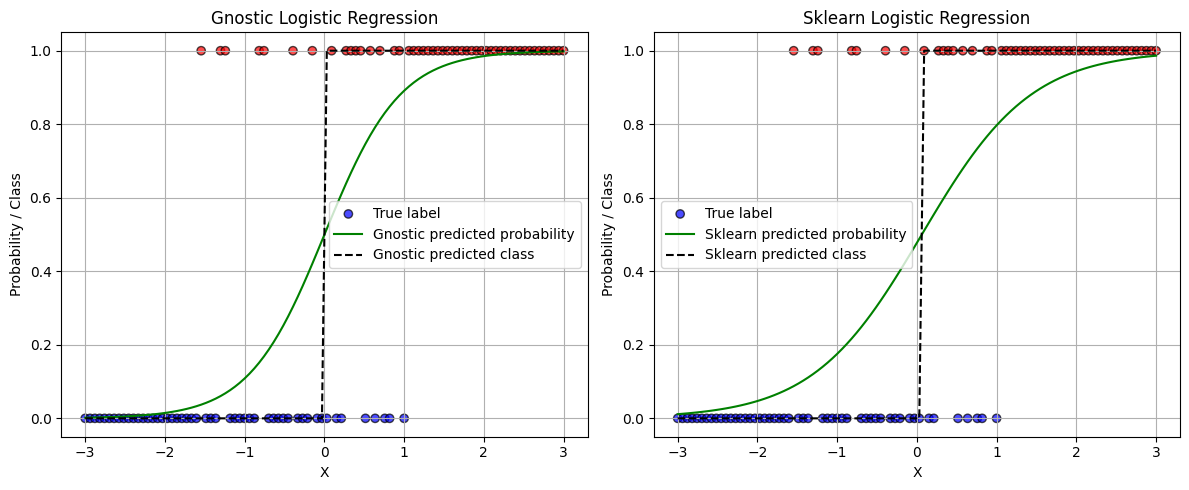

Gnostic Logistic Regression Evaluation:
Accuracy: 0.85
Precision: 0.84
Recall: 0.8571428571428571
F1-score: 0.8484848484848485

Confusion Matrix:
 [[43  8]
 [ 7 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.84      0.85        51
           1       0.84      0.86      0.85        49

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



Sklearn Logistic Regression Evaluation:
Accuracy: 0.86
Precision: 0.8571428571428571
Recall: 0.8571428571428571
F1-score: 0.8571428571428571

Confusion Matrix:
 [[44  7]
 [ 7 42]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86        51
           1       0.86      0.86      0.86        49

    accuracy                           0.86       100
   macro avg       0.86      0.86      0.86       100
wei

In [6]:
import numpy as np
import matplotlib.pyplot as plt
# from machinegnostics.magcal.param_log_reg import _LogisticRegressorParamBase
from machinegnostics.models.classification import LogisticRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Generate synthetic binary classification data
np.random.seed(0)
n_samples = 100
X = np.linspace(-3, 3, n_samples).reshape(-1, 1)
y = (X[:, 0] + np.random.normal(scale=1.0, size=n_samples) > 0).astype(int)

# --- Gnostic Logistic Regression ---
model = LogisticRegressor(degree=1, max_iter=100, tol=1e-6, verbose=True, proba='sigmoid')
model.fit(X, y)
proba_gnostic = model.predict_proba(X)
y_pred_gnostic = model.predict(X)

# --- Sklearn Logistic Regression ---
sk_model = LogisticRegression()
sk_model.fit(X, y)
proba_sk = sk_model.predict_proba(X)[:, 1]
y_pred_sk = sk_model.predict(X)

# --- Plots ---
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k', label='True label', alpha=0.7)
plt.plot(X, proba_gnostic, color='green', label='Gnostic predicted probability')
plt.plot(X, y_pred_gnostic, 'k--', label='Gnostic predicted class')
plt.xlabel('X')
plt.ylabel('Probability / Class')
plt.title('Gnostic Logistic Regression')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(X, y, c=y, cmap='bwr', edgecolor='k', label='True label', alpha=0.7)
plt.plot(X, proba_sk, color='green', label='Sklearn predicted probability')
plt.plot(X, y_pred_sk, 'k--', label='Sklearn predicted class')
plt.xlabel('X')
plt.ylabel('Probability / Class')
plt.title('Sklearn Logistic Regression')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# --- Evaluation ---
print('Gnostic Logistic Regression Evaluation:')
print("Accuracy:", accuracy_score(y, y_pred_gnostic))
print("Precision:", precision_score(y, y_pred_gnostic))
print("Recall:", recall_score(y, y_pred_gnostic))
print("F1-score:", f1_score(y, y_pred_gnostic))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_gnostic))
print("\nClassification Report:\n", classification_report(y, y_pred_gnostic))

print("\n" + "="*50 + "\n")

print('Sklearn Logistic Regression Evaluation:')
print("Accuracy:", accuracy_score(y, y_pred_sk))
print("Precision:", precision_score(y, y_pred_sk))
print("Recall:", recall_score(y, y_pred_sk))
print("F1-score:", f1_score(y, y_pred_sk))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_sk))
print("\nClassification Report:\n", classification_report(y, y_pred_sk))

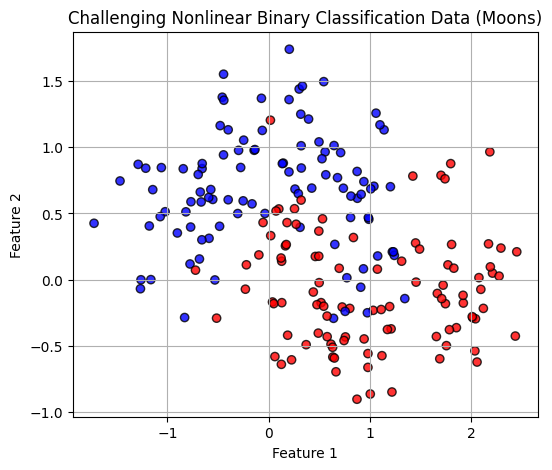

In [7]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np

# Generate a challenging nonlinear dataset
X, y = make_moons(n_samples=200, noise=0.3, random_state=42)

# Visualize the dataset
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', alpha=0.8)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Challenging Nonlinear Binary Classification Data (Moons)')
plt.grid(True)
plt.show()

Iteration 1, Log Loss: 0.693147, mean residual entropy: 0.500000
Iteration 2, Log Loss: 0.495863, mean residual entropy: 0.542145
Iteration 3, Log Loss: 0.341147, mean residual entropy: 0.216821
Iteration 4, Log Loss: 0.288941, mean residual entropy: 0.111776
Iteration 5, Log Loss: 0.254676, mean residual entropy: 0.070712
Iteration 6, Log Loss: 0.236706, mean residual entropy: 0.060198
Converged at iteration 7 (early stop): mean rentropy change below tolerance.


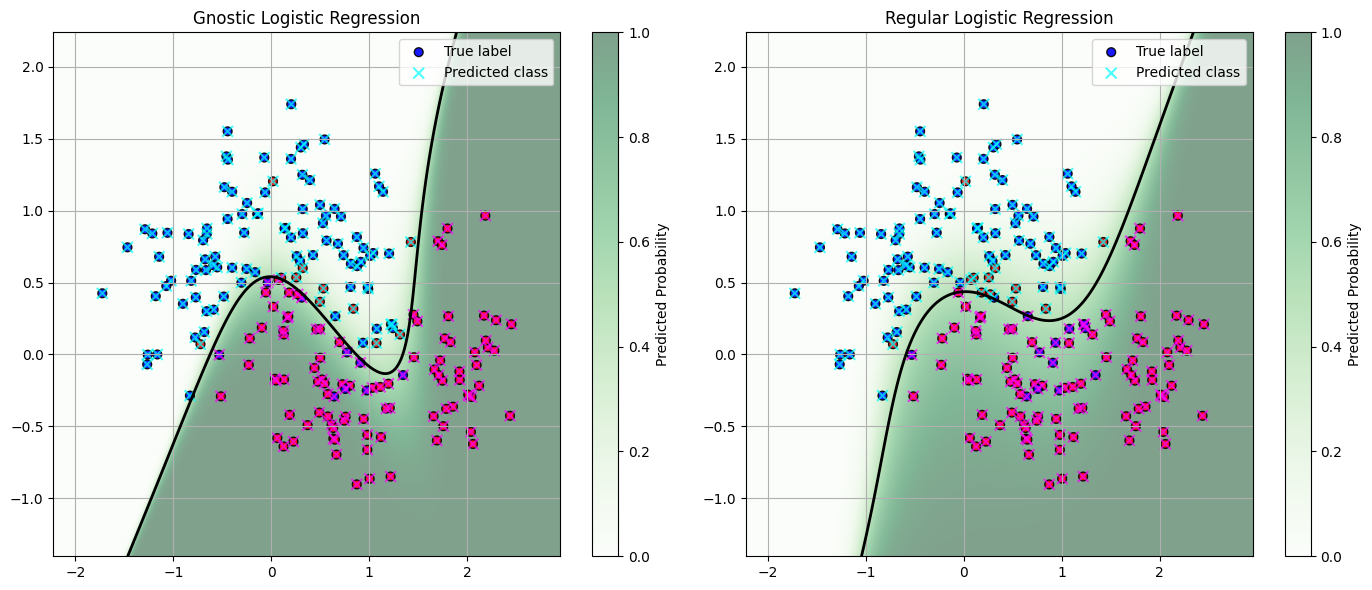

In [8]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
import numpy as np
from machinegnostics.models.classification import LogisticRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures

# Generate a challenging nonlinear dataset
X, y = make_moons(n_samples=200, noise=0.3, random_state=42)

# --- Gnostic Logistic Regression (with polynomial features for nonlinearity) ---
model = LogisticRegressor(degree=3,verbose=True, early_stopping=True, max_iter=15, proba='sigmoid', tol=0.01)
model.fit(X, y)
proba_gnostic = model.predict_proba(X)
y_pred_gnostic = model.predict(X)

# --- Sklearn Logistic Regression (with polynomial features for nonlinearity) ---
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)
sk_model = LogisticRegression(max_iter=200)
sk_model.fit(X_poly, y)
proba_sk = sk_model.predict_proba(X_poly)[:, 1]
y_pred_sk = sk_model.predict(X_poly)

# --- Plots ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Helper for background probability contour using imshow and contour
def plot_proba_contour(ax, model, X, proba_func, title, poly=None):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    if proba_func == "gnostic":
        zz = model.predict_proba(grid)
    else:
        zz = model.predict_proba(poly.transform(grid))[:, 1]
    zz = zz.reshape(xx.shape)

    # Plot probability background with imshow
    im = ax.imshow(zz, extent=(x_min, x_max, y_min, y_max), origin='lower',
                   aspect='auto', cmap='Greens', alpha=0.5, vmin=0, vmax=1)
    plt.colorbar(im, ax=ax, label='Predicted Probability')

    # Plot decision boundary (probability = 0.5)
    ax.contour(xx, yy, zz, levels=[0.5], colors='k', linewidths=2)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title(title)

# Usage:
plot_proba_contour(axes[0], model, X, "gnostic", "Gnostic Logistic Regression")
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40, label='True label', alpha=0.9)
axes[0].scatter(X[:, 0], X[:, 1], c=y_pred_gnostic, cmap='cool', marker='x', s=60, label='Predicted class', alpha=0.7)
axes[0].legend()
axes[0].grid(True)

plot_proba_contour(axes[1], sk_model, X, "sklearn", "Regular Logistic Regression", poly=poly)
axes[1].scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=40, label='True label', alpha=0.9)
axes[1].scatter(X[:, 0], X[:, 1], c=y_pred_sk, cmap='cool', marker='x', s=60, label='Predicted class', alpha=0.7)
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [9]:
# --- Evaluation ---
print('Gnostic Logistic Regression Evaluation:')
print("Accuracy:", accuracy_score(y, y_pred_gnostic))
print("Precision:", precision_score(y, y_pred_gnostic))
print("Recall:", recall_score(y, y_pred_gnostic))
print("F1-score:", f1_score(y, y_pred_gnostic))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_gnostic))
print("\nClassification Report:\n", classification_report(y, y_pred_gnostic))

print("\n" + "="*50 + "\n")

print('Sklearn Logistic Regression Evaluation:')
print("Accuracy:", accuracy_score(y, y_pred_sk))
print("Precision:", precision_score(y, y_pred_sk))
print("Recall:", recall_score(y, y_pred_sk))
print("F1-score:", f1_score(y, y_pred_sk))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_sk))
print("\nClassification Report:\n", classification_report(y, y_pred_sk))

Gnostic Logistic Regression Evaluation:
Accuracy: 0.9
Precision: 0.9081632653061225
Recall: 0.89
F1-score: 0.898989898989899

Confusion Matrix:
 [[91  9]
 [11 89]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       100
           1       0.91      0.89      0.90       100

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



Sklearn Logistic Regression Evaluation:
Accuracy: 0.875
Precision: 0.8712871287128713
Recall: 0.88
F1-score: 0.8756218905472637

Confusion Matrix:
 [[87 13]
 [12 88]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.87       100
           1       0.87      0.88      0.88       100

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.87       200
weighted avg      

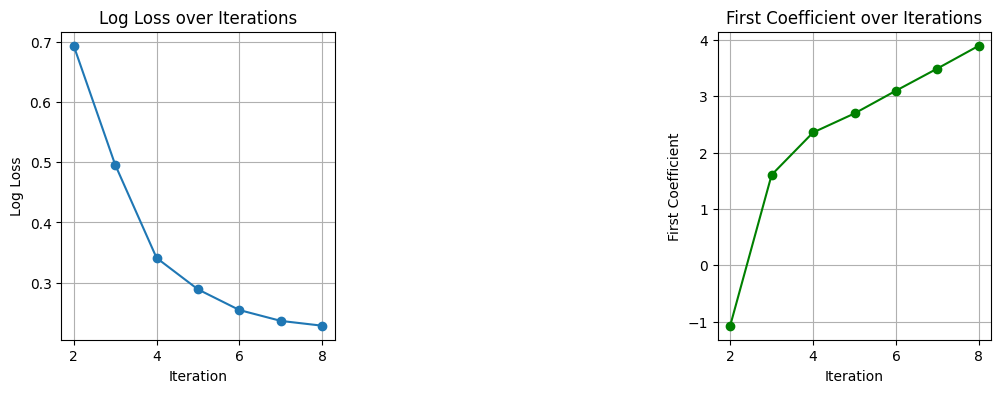

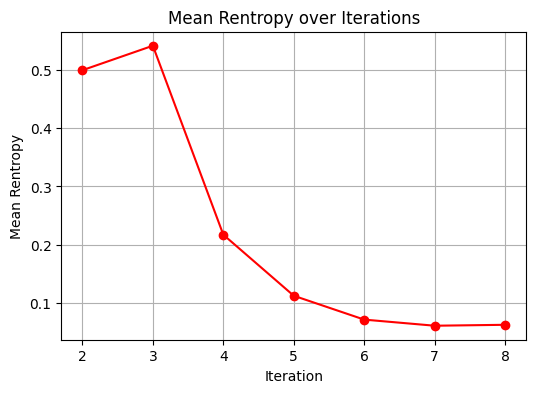

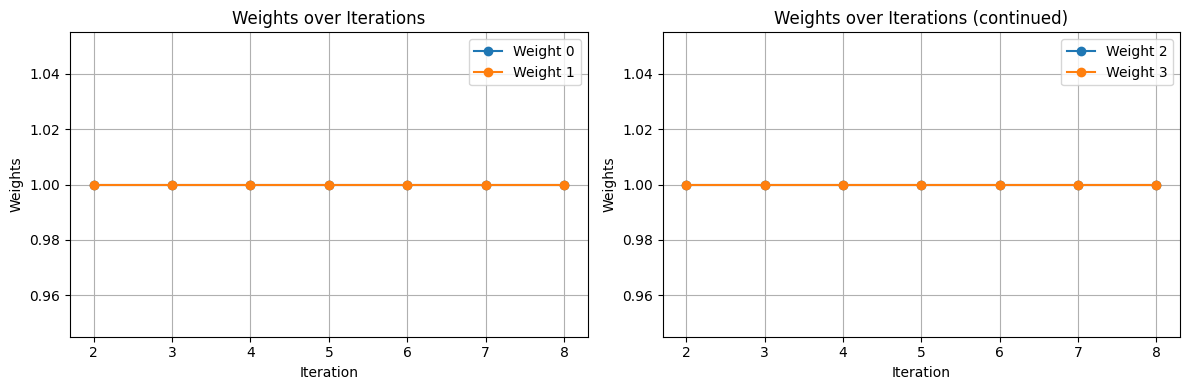

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Extract history
history = model._history

iterations = [h['iteration'] for h in history]
log_loss = [h['log_loss'] for h in history]
mean_rentropy = [np.mean(h['rentropy']) for h in history]
# Optionally, track the first coefficient as an example
coef_0 = [h['coefficients'][0] for h in history]

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.plot(iterations, log_loss, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss over Iterations')
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(iterations, coef_0, marker='o', color='green')
plt.xlabel('Iteration')
plt.ylabel('First Coefficient')
plt.title('First Coefficient over Iterations')
plt.grid(True)

# rentropy plot
plt.figure(figsize=(6, 4))
plt.plot(iterations, mean_rentropy, marker='o', color='red')
plt.xlabel('Iteration')
plt.ylabel('Mean Rentropy')
plt.title('Mean Rentropy over Iterations')
plt.grid(True)

# plots weights
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(iterations, [h['weights'][0] for h in history], marker='o', label='Weight 0')
plt.plot(iterations, [h['weights'][1] for h in history], marker='o', label='Weight 1')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.title('Weights over Iterations')
plt.legend()
plt.grid(True)
plt.subplot(1, 2, 2)
plt.plot(iterations, [h['weights'][2] for h in history], marker='o', label='Weight 2')
plt.plot(iterations, [h['weights'][3] for h in history], marker='o', label='Weight 3')
plt.xlabel('Iteration')
plt.ylabel('Weights')
plt.title('Weights over Iterations (continued)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [11]:
# import mlflow
# import numpy as np
# from sklearn.datasets import make_moons
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from machinegnostics.models import LogisticRegressor
# import pandas as pd
# from mlflow.models import infer_signature

# # Generate nonlinear moon dataset
# X, y = make_moons(n_samples=200, noise=0.3, random_state=42)

# with mlflow.start_run():
#     # Log parameters
#     degree = 3
#     max_iter = 30
#     tol = 1e-3
#     mlflow.log_param("degree", degree)
#     mlflow.log_param("max_iter", max_iter)
#     mlflow.log_param("tol", tol)

#     # Train model
#     model = LogisticRegressor(degree=degree, max_iter=max_iter, tol=tol, verbose=False)
#     model.fit(X, y)

#     # Predict
#     y_pred = model.predict(X)

#     input_example = pd.DataFrame(X)
#     signature = infer_signature(model_input=input_example, model_output=y)

#     # Metrics
#     acc = accuracy_score(y, y_pred)
#     prec = precision_score(y, y_pred)
#     rec = recall_score(y, y_pred)
#     f1 = f1_score(y, y_pred)

#     # Log metrics
#     mlflow.log_metric("accuracy", acc)
#     mlflow.log_metric("precision", prec)
#     mlflow.log_metric("recall", rec)
#     mlflow.log_metric("f1_score", f1)

#     # Log model
#     # Log the model
#     mlflow.pyfunc.log_model(
#         artifact_path="logistic_regressor",
#         python_model=model,
#         registered_model_name="GnosticRobustRegressor",
#         input_example=input_example,
#         signature=signature
#     )

#     print(f"Logged to MLflow: accuracy={acc:.3f}, precision={prec:.3f}, recall={rec:.3f}, f1={f1:.3f}")